IMPORT ALL NECESSARY LIBRARIES

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
# NLP libraries
import nltk
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from nltk.sentiment.vader import SentimentIntensityAnalyzer
from nltk.corpus import stopwords


[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


True

DATA ACQUISITION

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

In [ ]:
path = "/content/drive/MyDrive/social_media_sentiment.csv"

df = pd.read_csv(path)
print(df.to_string())

                                                                                       review sentiment
0    This movie was fantastic! The plot was engaging, and the characters were well developed.  positive
1                        I didn't enjoy this movie. The storyline was predictable and boring.  negative
2                                 The actors did a great job, and I loved the cinematography.  positive
3                                      The film was a waste of time. I wouldn’t recommend it.  negative
4                                  An amazing film with a moving story and incredible acting!  positive
5                                It was hard to sit through this movie; the pace was so slow.  negative
6                              The special effects were stunning, but the story lacked depth.  negative
7                                    A beautifully crafted movie with a heartwarming message.  positive
8                                            I fell asleep halfw

In [ ]:
from google.colab import files
uploaded = files.upload()

KeyboardInterrupt: 

DATA PREPROCESSING

In [ ]:
# Load dataset into Pandas DataFrame
df = pd.read_csv('social_media_sentiment.csv')

FileNotFoundError: [Errno 2] No such file or directory: 'social_media_sentiment.csv'

CHECK FOR MISSING VALUES

In [ ]:
print(df.isnull().sum())
# Handle missing values (if any)
df = df.dropna()
# Remove duplicates
df = df.drop_duplicates()

review       0
sentiment    0
dtype: int64


TEXT PREPROCESSING

In [ ]:
# Example: Text preprocessing using NLTK
nltk.download('stopwords')
nltk.download('punkt')
stop_words = set(stopwords.words('english'))
def preprocess_text(text):
  # Tokenization
  words = word_tokenize(text.lower())
  # Remove stop words and non-alphanumeric characters
  words = [word for word in words if word.isalnum() and word not in stop_words]
  return ' '.join(words)
df['clean_text'] = df['review'].apply(preprocess_text) # Changed 'text' to 'review'

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.


SENTIMENT ANALYSIS

In [ ]:
# Example: Sentiment analysis using Vader
nltk.download('vader_lexicon')
sid = SentimentIntensityAnalyzer()
df['sentiment_scores'] = df['clean_text'].apply(lambda text: sid.polarity_scores(text))
df['compound_score'] = df['sentiment_scores'].apply(lambda score_dict:
score_dict['compound'])
# Classify sentiment based on compound score
df['sentiment'] = df['compound_score'].apply(lambda score: 'positive' if score >= 0.05
else ('negative' if score <= -0.05 else 'neutral'))

[nltk_data] Downloading package vader_lexicon to /root/nltk_data...


DATA VISUALIZATION

<ipython-input-23-cbee89596b3a>:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='sentiment', data=df, palette='coolwarm')


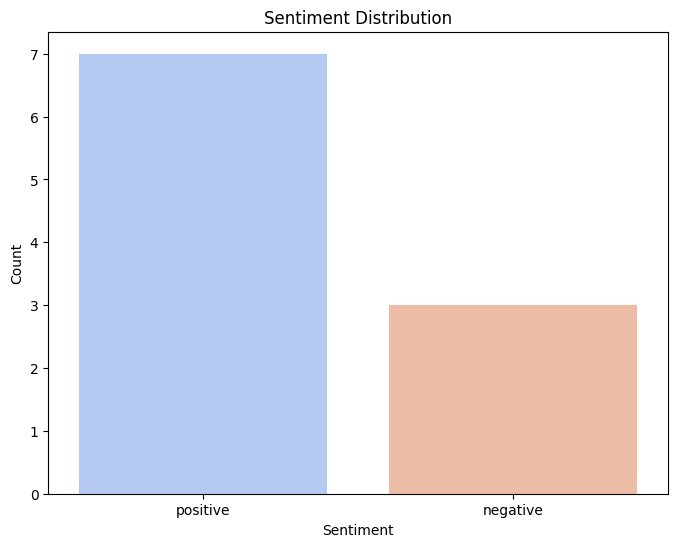

In [ ]:
# Example: Visualize sentiment distribution
plt.figure(figsize=(8, 6))
sns.countplot(x='sentiment', data=df, palette='coolwarm')
plt.title('Sentiment Distribution')
plt.xlabel('Sentiment')
plt.ylabel('Count')
plt.show()

ADVANCED DATA SCIENCE TECHNIQUES

In [ ]:
# Example: Topic modeling using LDA (if applicable)
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.decomposition import LatentDirichletAllocation as LDA
vectorizer = CountVectorizer(max_df=0.95, min_df=2, stop_words='english')
dtm = vectorizer.fit_transform(df['clean_text'])
lda_model = LDA(n_components=3, random_state=42)
lda_model.fit(dtm)
# Display top words per topic
for index, topic in enumerate(lda_model.components_):
  print(f"Topic #{index+1}")
  print([vectorizer.get_feature_names_out()[i] for i in topic.argsort()[-10:]])
  print('\n')

Topic #1
['movie', 'story', 'film']


Topic #2
['story', 'film', 'movie']


Topic #3
['movie', 'film', 'story']




CONCLUSION

In [ ]:
# Example: Summarize findings and provide recommendations
print("Summary of Social Media Sentiment Analysis:")
# Add your summary statements based on the analysis
# Example recommendation based on insights
if df['sentiment'].value_counts()['negative'] > 0.3 * len(df):
  print("Recommend addressing negative sentiment through targeted campaigns orcustomer service improvements.")
else:
  print("Overall sentiment analysis shows positive or neutral sentiments prevailing.")

Summary of Social Media Sentiment Analysis:
Overall sentiment analysis shows positive or neutral sentiments prevailing.
